In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Numerical and Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

# Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Gradient Boosting Algorithms
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


In [5]:
file_path = r'C:/Users/ASUS/Downloads/application_data.csv'

data = pd.read_csv(file_path)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [6]:
# Print columns and rows with missing values
missing_columns = data.columns[data.isnull().any()]
print(data[missing_columns].isnull().sum())

rows_with_missing = data.isna().any(axis=1)  # Boolean mask
num_rows_with_missing = rows_with_missing.sum()  # Count rows with any missing value

print(f"Number of rows with missing values: {num_rows_with_missing}")

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64
Number of rows with missing values: 298909


In [7]:
df_cleaned = data.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [8]:
# Drop all columns with dtype 'object'
df_cleaned = df_cleaned.drop(df_cleaned.select_dtypes(include=['object']).columns, axis=1)
X = df_cleaned.drop(columns=['TARGET'])
y = df_cleaned['TARGET']
print("Column Names:", X.columns.tolist())
X.head()

Column Names: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', '

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,-341.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,-762.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,-180.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,-464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,-335.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [9]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_X


array([[-1.73350287, -0.77750209, -0.84414514, ..., -0.35176324,
        -0.43248919,  0.70722825],
       [-1.73290217,  0.51288436, -0.14406406, ..., -0.35176324,
        -0.43248919,  0.70722825],
       [-1.73257275, -0.77750209, -0.14406406, ...,  0.60156612,
        -0.43248919,  1.27647851],
       ...,
       [ 1.7162289 ,  0.51288436,  0.26962022, ...,  0.60156612,
        -0.43248919, -0.43127225],
       [ 1.71676178, -0.77750209, -0.90778888, ..., -0.35176324,
        -0.43248919,  0.70722825],
       [ 1.71706213, -0.77750209,  0.01504528, ..., -0.35176324,
        -0.43248919, -0.43127225]])

In [10]:
#oversampling minority class
# Define the oversampler
undersampler = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(scaled_X, y)

# Check new class distribution
print("Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled Class Distribution:
TARGET
0    8076
1    8076
Name: count, dtype: int64


In [11]:
#Perform PCA
pca = PCA(n_components=48)  # Retain 48 components
X_resampled_pca = pca.fit_transform(X_resampled)

#Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Explained Variance:", explained_variance.sum())

#Explained variance >90% with 48 components

print(f"Shape after PCA - X_resampled_pca: {X_resampled_pca.shape}")
print(f"Shape after PCA - Y_resampled: {y_resampled.shape}")
assert X_resampled_pca.shape[0] == len(y_resampled), "Mismatch in number of samples!"


Explained Variance Ratio: [0.20558528 0.05411953 0.03983359 0.0392447  0.0307003  0.02925548
 0.02656426 0.02176352 0.02120676 0.02014126 0.01986139 0.01825823
 0.01717106 0.01661277 0.01606208 0.01525535 0.01469499 0.0134836
 0.01305657 0.01269635 0.01243379 0.01215589 0.01200216 0.01154797
 0.01126192 0.01096712 0.01086774 0.0104689  0.01012706 0.00999036
 0.00968342 0.00947207 0.00937023 0.00884082 0.00875366 0.00866062
 0.00860061 0.00839988 0.00824821 0.00800753 0.00786474 0.00758376
 0.00752208 0.00725022 0.00716345 0.00700812 0.00695765 0.00675546]
Total Explained Variance: 0.9035324956594226
Shape after PCA - X_resampled_pca: (16152, 48)
Shape after PCA - Y_resampled: (16152,)


In [12]:
# First split: Training (70%) and temporary (30%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_pca, y_resampled, test_size=0.3, random_state=42)
# Second split: Validation (20%) and Testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3333, random_state=42)

# Check the sizes of each split
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (11306, 48), (11306,)
Validation set: (3230, 48), (3230,)
Testing set: (1616, 48), (1616,)


In [13]:
# Initialize the KNN model with 5 neighbors (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_val)

y_test_pred = knn.predict(X_test)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))



Validation Accuracy: 0.8108359133126934
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77      1616
           1       0.73      1.00      0.84      1614

    accuracy                           0.81      3230
   macro avg       0.86      0.81      0.80      3230
weighted avg       0.86      0.81      0.80      3230

Validation Confusion Matrix:
[[1006  610]
 [   1 1613]]
Testing Accuracy: 0.7933168316831684
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       810
           1       0.71      1.00      0.83       806

    accuracy                           0.79      1616
   macro avg       0.85      0.79      0.78      1616
weighted avg       0.85      0.79      0.78      1616

Testing Confusion Matrix:
[[476 334]
 [  0 806]]


In [14]:
#KNN model with 3 neighbors
knn2 = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn2.fit(X_train, y_train)

y_val_pred2 = knn2.predict(X_val)

y_test_pred2 = knn2.predict(X_test)

# Evaluate the model on the validation set
val_accuracy2 = accuracy_score(y_val, y_val_pred2)
print("Validation Accuracy:", val_accuracy2)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred2))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred2))

# Evaluate the model on the testing set
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Testing Accuracy:", test_accuracy2)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred2))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred2))




Validation Accuracy: 0.8411764705882353
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      1616
           1       0.76      1.00      0.86      1614

    accuracy                           0.84      3230
   macro avg       0.88      0.84      0.84      3230
weighted avg       0.88      0.84      0.84      3230

Validation Confusion Matrix:
[[1103  513]
 [   0 1614]]
Testing Accuracy: 0.8323019801980198
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       810
           1       0.75      1.00      0.86       806

    accuracy                           0.83      1616
   macro avg       0.87      0.83      0.83      1616
weighted avg       0.87      0.83      0.83      1616

Testing Confusion Matrix:
[[540 270]
 [  1 805]]


In [15]:
#KNN model with 7 neighbors
knn3 = KNeighborsClassifier(n_neighbors=7)

# Train the model on the training data
knn3.fit(X_train, y_train)

y_val_pred3 = knn3.predict(X_val)

y_test_pred3 = knn3.predict(X_test)

# Evaluate the model on the validation set
val_accuracy3 = accuracy_score(y_val, y_val_pred3)
print("Validation Accuracy:", val_accuracy3)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred3))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred3))

# Evaluate the model on the testing set
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
print("Testing Accuracy:", test_accuracy3)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred3))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred3))

Validation Accuracy: 0.7894736842105263
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      1616
           1       0.70      1.00      0.83      1614

    accuracy                           0.79      3230
   macro avg       0.85      0.79      0.78      3230
weighted avg       0.85      0.79      0.78      3230

Validation Confusion Matrix:
[[ 937  679]
 [   1 1613]]
Testing Accuracy: 0.7747524752475248
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       810
           1       0.69      1.00      0.82       806

    accuracy                           0.77      1616
   macro avg       0.84      0.78      0.76      1616
weighted avg       0.84      0.77      0.76      1616

Testing Confusion Matrix:
[[446 364]
 [  0 806]]


In [16]:
#KNN model with 9 neighbors
knn4 = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training data
knn4.fit(X_train, y_train)

y_val_pred4 = knn4.predict(X_val)

y_test_pred4 = knn4.predict(X_test)

# Evaluate the model on the validation set
val_accuracy4 = accuracy_score(y_val, y_val_pred4)
print("Validation Accuracy:", val_accuracy4)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred4))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred4))

# Evaluate the model on the testing set
test_accuracy4 = accuracy_score(y_test, y_test_pred4)
print("Testing Accuracy:", test_accuracy4)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred4))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred4))


Validation Accuracy: 0.7743034055727555
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1616
           1       0.69      1.00      0.82      1614

    accuracy                           0.77      3230
   macro avg       0.84      0.77      0.76      3230
weighted avg       0.84      0.77      0.76      3230

Validation Confusion Matrix:
[[ 889  727]
 [   2 1612]]
Testing Accuracy: 0.7561881188118812
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.51      0.68       810
           1       0.67      1.00      0.80       806

    accuracy                           0.76      1616
   macro avg       0.83      0.76      0.74      1616
weighted avg       0.84      0.76      0.74      1616

Testing Confusion Matrix:
[[417 393]
 [  1 805]]


In [17]:
#KNN model with 11 neighbors
knn5 = KNeighborsClassifier(n_neighbors=11)

# Train the model on the training data
knn5.fit(X_train, y_train)

y_val_pred5 = knn5.predict(X_val)

y_test_pred5 = knn5.predict(X_test)

# Evaluate the model on the validation set
val_accuracy5 = accuracy_score(y_val, y_val_pred5)
print("Validation Accuracy:", val_accuracy5)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred5))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred5))

# Evaluate the model on the testing set
test_accuracy5 = accuracy_score(y_test, y_test_pred5)
print("Testing Accuracy:", test_accuracy5)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred5))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred5))

Validation Accuracy: 0.7609907120743034
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.52      0.69      1616
           1       0.68      1.00      0.81      1614

    accuracy                           0.76      3230
   macro avg       0.84      0.76      0.75      3230
weighted avg       0.84      0.76      0.75      3230

Validation Confusion Matrix:
[[ 847  769]
 [   3 1611]]
Testing Accuracy: 0.7475247524752475
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.66       810
           1       0.66      1.00      0.80       806

    accuracy                           0.75      1616
   macro avg       0.83      0.75      0.73      1616
weighted avg       0.83      0.75      0.73      1616

Testing Confusion Matrix:
[[404 406]
 [  2 804]]


In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = logreg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the testing set
y_test_pred = logreg.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))




Validation Accuracy: 0.7021671826625387
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1616
           1       0.70      0.71      0.71      1614

    accuracy                           0.70      3230
   macro avg       0.70      0.70      0.70      3230
weighted avg       0.70      0.70      0.70      3230

Validation Confusion Matrix:
[[1114  502]
 [ 460 1154]]
Testing Accuracy: 0.7042079207920792
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       810
           1       0.69      0.73      0.71       806

    accuracy                           0.70      1616
   macro avg       0.70      0.70      0.70      1616
weighted avg       0.70      0.70      0.70      1616

Testing Confusion Matrix:
[[548 262]
 [216 590]]


In [19]:
#Bernoulli Naive Bayes because so many fields are boolean
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = bnb.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the testing set
y_test_pred = bnb.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Validation Accuracy: 0.651702786377709
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1616
           1       0.66      0.63      0.65      1614

    accuracy                           0.65      3230
   macro avg       0.65      0.65      0.65      3230
weighted avg       0.65      0.65      0.65      3230

Validation Confusion Matrix:
[[1082  534]
 [ 591 1023]]
Testing Accuracy: 0.6763613861386139
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       810
           1       0.68      0.66      0.67       806

    accuracy                           0.68      1616
   macro avg       0.68      0.68      0.68      1616
weighted avg       0.68      0.68      0.68      1616

Testing Confusion Matrix:
[[558 252]
 [271 535]]


In [20]:
#Random Forest Classifier because so many fields are boolean
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rfc.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the testing set
y_test_pred = rfc.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9572755417956657
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1616
           1       0.95      0.97      0.96      1614

    accuracy                           0.96      3230
   macro avg       0.96      0.96      0.96      3230
weighted avg       0.96      0.96      0.96      3230

Validation Confusion Matrix:
[[1532   84]
 [  54 1560]]
Testing Accuracy: 0.9461633663366337
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       810
           1       0.94      0.95      0.95       806

    accuracy                           0.95      1616
   macro avg       0.95      0.95      0.95      1616
weighted avg       0.95      0.95      0.95      1616

Testing Confusion Matrix:
[[761  49]
 [ 38 768]]


In [21]:
#KNN model with 1 neighbor
knn6 = KNeighborsClassifier(n_neighbors=1)

# Train the model on the training data
knn6.fit(X_train, y_train)

y_val_pred6 = knn6.predict(X_val)

y_test_pred6 = knn6.predict(X_test)

# Evaluate the model on the validation set
val_accuracy6 = accuracy_score(y_val, y_val_pred6)
print("Validation Accuracy:", val_accuracy6)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred6))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred6))

# Evaluate the model on the testing set
test_accuracy6 = accuracy_score(y_test, y_test_pred6)
print("Testing Accuracy:", test_accuracy6)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred6))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred6))

Validation Accuracy: 0.8869969040247678
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1616
           1       0.82      1.00      0.90      1614

    accuracy                           0.89      3230
   macro avg       0.91      0.89      0.89      3230
weighted avg       0.91      0.89      0.89      3230

Validation Confusion Matrix:
[[1251  365]
 [   0 1614]]
Testing Accuracy: 0.880569306930693
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       810
           1       0.81      1.00      0.89       806

    accuracy                           0.88      1616
   macro avg       0.90      0.88      0.88      1616
weighted avg       0.90      0.88      0.88      1616

Testing Confusion Matrix:
[[618 192]
 [  1 805]]


In [22]:
#KNN model with 2 neighbors
knn7 = KNeighborsClassifier(n_neighbors=2)

# Train the model on the training data
knn7.fit(X_train, y_train)

y_val_pred7 = knn7.predict(X_val)

y_test_pred7 = knn7.predict(X_test)

# Evaluate the model on the validation set
val_accuracy7 = accuracy_score(y_val, y_val_pred7)
print("Validation Accuracy:", val_accuracy7)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred7))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred7))

# Evaluate the model on the testing set
test_accuracy7 = accuracy_score(y_test, y_test_pred7)
print("Testing Accuracy:", test_accuracy7)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred7))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred7))

Validation Accuracy: 0.9114551083591331
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1616
           1       0.85      1.00      0.92      1614

    accuracy                           0.91      3230
   macro avg       0.92      0.91      0.91      3230
weighted avg       0.92      0.91      0.91      3230

Validation Confusion Matrix:
[[1333  283]
 [   3 1611]]
Testing Accuracy: 0.9071782178217822
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       810
           1       0.84      1.00      0.91       806

    accuracy                           0.91      1616
   macro avg       0.92      0.91      0.91      1616
weighted avg       0.92      0.91      0.91      1616

Testing Confusion Matrix:
[[661 149]
 [  1 805]]


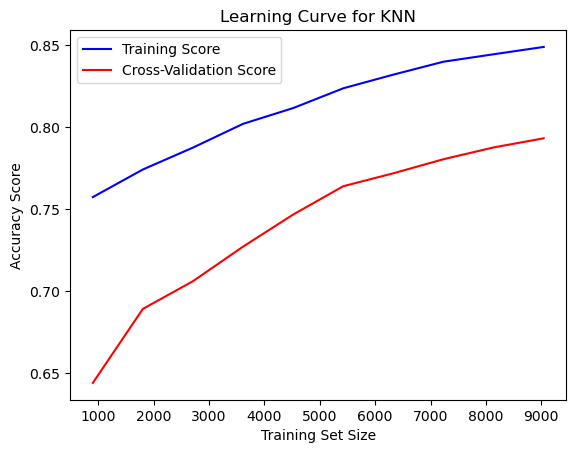

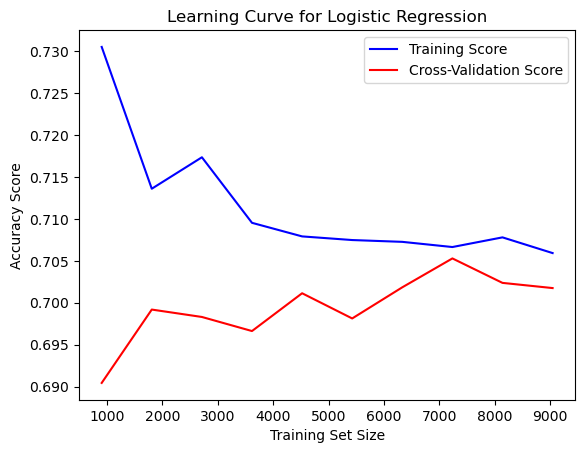

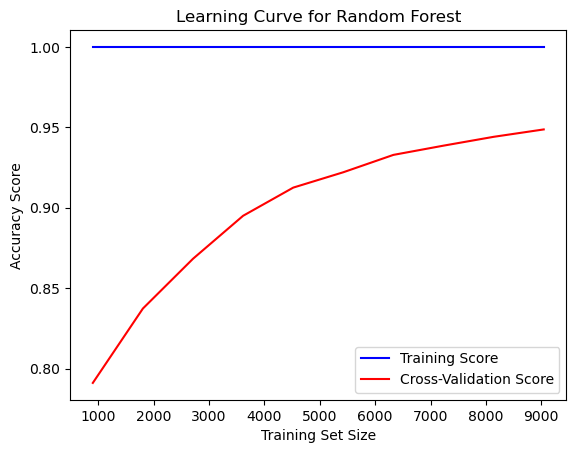

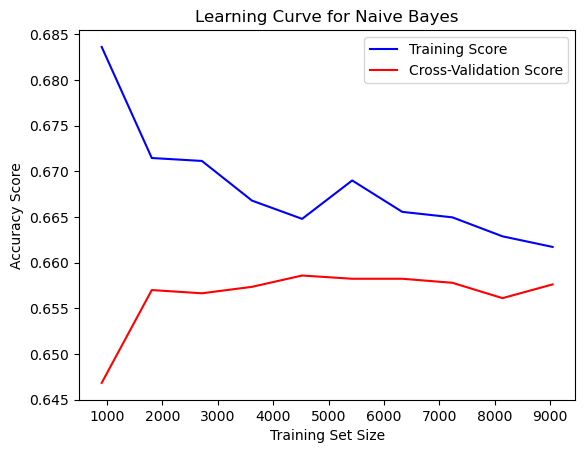

In [25]:
#generating learning curves to identify whether the model suffers from overfitting or underfitting
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="red")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
plot_learning_curve(knn, X_train, y_train, title="Learning Curve for KNN")
plot_learning_curve(logreg, X_train, y_train, title="Learning Curve for Logistic Regression")
plot_learning_curve(rfc, X_train, y_train, title="Learning Curve for Random Forest")
plot_learning_curve(bnb, X_train, y_train, title="Learning Curve for Naive Bayes")

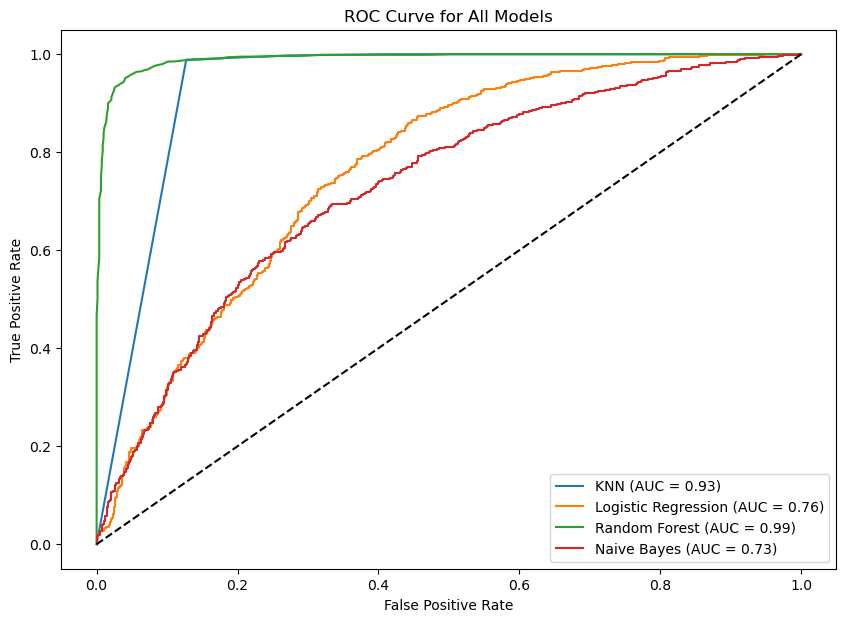

In [26]:
#ROC curve for all models
def plot_roc_curve(models, model_names, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for All Models")
    plt.legend()
    plt.show()

# Example usage
models = [knn, logreg, rfc, bnb]
model_names = ["KNN", "Logistic Regression", "Random Forest", "Naive Bayes"]
plot_roc_curve(models, model_names, X_train, y_train, X_test, y_test)

In [ ]:
#table summarizing all evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Compare models
results = []
models = [knn, logreg, rfc, bnb]
model_names = ["KNN", "Logistic Regression", "Random Forest", "Naive Bayes"]

for model, name in zip(models, model_names):
    results.append(evaluate_model(model, X_train, y_train, X_test, y_test, name))

# Convert results into a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

In [ ]:
#confusion matrix visualization
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Example
plot_confusion_matrix(knn, X_test, y_test, "Confusion Matrix for KNN")
plot_confusion_matrix(rfc, X_test, y_test, "Confusion Matrix for Random Forest")